# Presentation

In [1]:
# import dependencies
import cv2
from IPython.display import display, clear_output
from PIL import Image, ImageDraw
import numpy as np
import keyboard

In [2]:
from ultralytics import YOLO

# Load a pre-trained YOLOv10n model
model = YOLO("./../Model/YOLOv10x_hands.pt")

In [3]:
def draw_rectangle(frame, startXY, endXY, color=(0, 255, 0), thickness=2, text=""):
    y = startXY[1] - 10 if startXY[1] - 10 > 10 else startXY[1] + 10
    cv2.rectangle(frame, startXY, endXY, color, thickness)
    cv2.putText(frame, text, (startXY[0], y), cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)


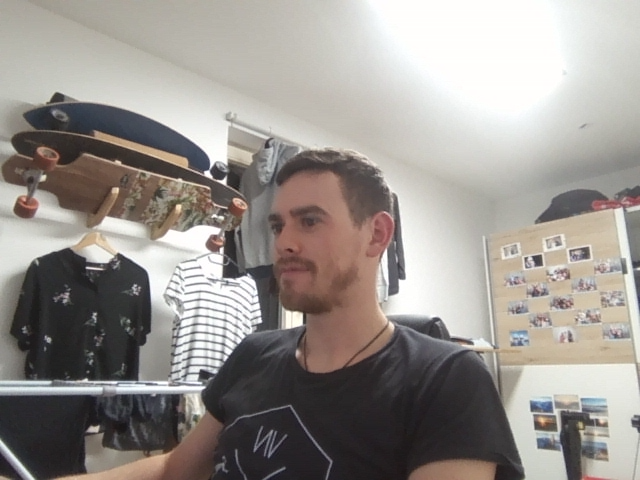

Key 'q' pressed. Exiting.


In [5]:
# Open the video capture (camera)
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Could not open video stream.")
else:
    try:
        while True:
            # Capture frame-by-frame
            ret, frame = cap.read()

            # If frame was not captured correctly, break the loop
            if not ret:
                print("Failed to grab frame.")
                break

            # Convert frame (BGR to RGB)
            rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

            # Draw a rectangle on the frame
            #draw_rectangle(rgb_frame, (100, 100), (200, 200), text="Hand")

            # Convert to Image for display in Jupyter
            img = Image.fromarray(rgb_frame)

            # Perform object detection on the frame using YOLO
            results = model(img)

            # Draw bounding boxes on the frame
            draw = ImageDraw.Draw(img)

            for result in results:
                for detection in result.boxes:
                    # Get the bounding box coordinates and class
                    x1, y1, x2, y2 = detection.xyxy[0].tolist()  # Bounding box corners
                    #class_name = detection.label  # Detected class name

                    # Draw the bounding box and label
                    draw.rectangle([x1, y1, x2, y2], outline="green", width=2)
                    #draw.text((x1, y1 - 10), class_name, fill="red")  # Draw class label

            # Clear previous output and display the current frame
            clear_output(wait=True)
            display(img)

            # Check for 'q' key press to stop the loop
            if keyboard.is_pressed('q'):
                print("Key 'q' pressed. Exiting.")
                break
    except KeyboardInterrupt:
        print("Stopped manually.")
    finally:
        # Release the capture object
        cap.release()
        cv2.destroyAllWindows()